# Christmas Movies predictions

## A- Importing Python librairies

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

## B- Imports from various databases

##  B-1 :christmas_movies.csv as data1 

In [2]:
data1=pd.read_csv('christmas_movies.csv')
data1.head()

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",$71.32M
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",$285.76M
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",$260.04M


## B-2 :imdb_top1k.csv as data2

In [3]:
data2=pd.read_csv('imdb_top1k.csv')
data2.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"


## B-3: movies_budgets.csv as data3

In [4]:
data3=pd.read_csv('movie_budgets.csv')
data3.head()

,year,date,title,production budget
0,2022.0,"Dec 9, 2022",Avatar: The Way of Water,460000000
1,2019.0,"Apr 23, 2019",Avengers: Endgame,400000000
2,2011.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000
3,2015.0,"Apr 22, 2015",Avengers: Age of Ultron,365000000
4,2023.0,"May 17, 2023",Fast X,340000000


## C : Analysis -Part1 : Presentation and Data description

## C1- Dataset 1 : Christmas_movies

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         788 non-null    object 
 1   release_year  780 non-null    float64
 2   description   788 non-null    object 
 3   type          788 non-null    object 
 4   rating        646 non-null    object 
 5   runtime       749 non-null    float64
 6   imdb_rating   749 non-null    float64
 7   genre         787 non-null    object 
 8   director      783 non-null    object 
 9   stars         776 non-null    object 
 10  gross         81 non-null     object 
dtypes: float64(3), object(8)
memory usage: 67.8+ KB


In [6]:
#Columns of the database 
print(data1.columns)

Index(['title', 'release_year', 'description', 'type', 'rating', 'runtime',
       'imdb_rating', 'genre', 'director', 'stars', 'gross'],
      dtype='object')


In [7]:
#Length of database
n1=len(data1)
print ('Numbers of observations:' , n1)

Numbers of observations: 788


In [8]:
#Detecting missing values
missing_values = data1.isnull().sum()
# Print missing values by columns
print(missing_values)

title             0
release_year      8
description       0
type              0
rating          142
runtime          39
imdb_rating      39
genre             1
director          5
stars            12
gross           707
dtype: int64


## Comments about data1

We have a Christmas movie database with 11 columns and 788 observations. Among these, there are three quantitative variables and eight qualitative variables. Here's a summary of the variables:

Quantitative Variables:
release_year: Year the movie was released

Missing values: 8
runtime: Movie runtime in minutes

Missing values: 39
imdb_rating: IMDB rating

Missing values: 39
Qualitative Variables:
title: Title of the movie

description: Short description of the movie

type: Type of production (e.g., Movie, TV Episode)

rating: Rating/certificate (e.g., PG)

Missing values: 142
genre: List of genres (e.g., Comedy, Drama)

director: Director of the movie

Missing values: 5
stars: List of actors in the movie

Missing values: 12
gross: Domestic gross of the movie in US dollars

Missing values: 707

## C2- Dataset2: imdb_top1k

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  Gross          831 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


In [10]:
#Columns of the database 
print(data2.columns)

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'Gross'],
      dtype='object')


In [11]:
#Length of database
n2=len(data2)
print ('Numbers of observations:' , n2)

Numbers of observations: 1000


In [12]:
# Detecting missing values
missing_values = data2.isnull().sum()
print(missing_values)

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
Gross            169
dtype: int64


## Comments about data2

Welcome to the database of the top 1000 films, curated based on a rating ranking. This comprehensive dataset comprises 1000 observations and 14 variables, including 2 quantitative and 10 qualitative variables. Let's delve into the details:

- Variables:
1. Released_year: Year the movie was released
2. Runtime: Movie runtime in minutes
3. Qualitative Variables:
4. Serie_title: Title of the movie
5. Certificate: Rating/certificate (e.g., PG)
6. Missing values: 101
7. Genre: List of genres (e.g., Comedy, Drama)
8. IMDB_Rating: IMDB rating
9. Overview: Short description of the movie
10. Meta_score:
11. Missing values: 157
12. Director: Director of the movie
13. Star: List of actors in the movieGross:
14.  Domestic gross of the movie in US dollars
Missing values: 169
This rich dataset provides valuable insights into the cinematic world. However, we've identified some missing values, particularly in the variables Certificate (101), Meta_score (157), and Gross (169). 

## C3- Data3 : movie_budgets

In [13]:
data3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               6328 non-null   float64
 1   date               6440 non-null   object 
 2   title              6440 non-null   object 
 3   production budget  6440 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 201.4+ KB


In [14]:
#Columns of the database 
print(data3.columns)

Index(['year', 'date', 'title', 'production budget'], dtype='object')


In [15]:
#Length of database
n3=len(data3)
print ('Numbers of observations:' , n3)

Numbers of observations: 6440


In [16]:
# Detecting missing values
missing_values = data3.isnull().sum()

# Print the misssing values by columns
print(missing_values)

year                 112
date                   0
title                  0
production budget      0
dtype: int64


## Comments about data3

Welcome to our movie database, containing 6440 observations and featuring 4 variables—two quantitative and two qualitative. Let's explore the details:

Quantitative Variables:
Year: Year the movie was released
Missing values: 112
Production Budget: Production budget in US dollars
Qualitative Variables:
Date: Date the movie was released
Title: Title of the movie
This diverse dataset provides insights into the cinematic landscape, encompassing release details and production budgets. Notably, we've identified 112 missing values in the 'Year' variable. 

## D- Analysis Part 2 : Pre-processing of data

## D1- Transformation of the variable "gross" into a numeric variable (christmas_movies.csv)

_It appears there might be a slight misunderstanding. The 'Gross' variable, which represents the domestic gross of the movie in US dollars, is typically a quantitative variable, as it involves numerical values. If you intend to transform qualitative data into quantitative data using regex in pandas (pd), it would be more applicable for variables that have numerical information but are currently stored as strings._

In [17]:
data1['gross'] = data1['gross'].replace('[\$,M]', '', regex=True).astype(float)
data1.head()


,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",59.70
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",71.32
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",285.76
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",260.04


## D2- Transformation of the variable "gross" into a numeric variable (imdb_top1k.csv)¶

In [18]:
data2['Gross'] = data2['Gross'].replace('[\$,M]', '', regex=True).astype(float)
data2.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,4360000.0


## D3- Transformation of 'Released_year' and 'Runtime' into numerical variables (imdb_top1k.csv)

_The 'Runtime' and 'Released_year' variables are typically quantitative variables, as they involve numerical values. We intend to transform these variables using regex in Python_

In [19]:
data2['Runtime'] = data2['Runtime'].str.replace(' min', '', regex=False).astype(int)
data2['Released_Year'] = pd.to_numeric(data2['Released_Year'], errors='coerce')
data2.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,28341469.0
1,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,134966411.0
2,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,534858444.0
3,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,57300000.0
4,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,4360000.0


## D4- Handling Missing values (christmas_movies.csv)

In [20]:
# Removing missing values for released_year variable
data1.dropna(subset=['release_year'], inplace=True)
# Replacement of missing values by modal observation (variable rating)
mode_rating = data1['rating'].mode()[0]
data1['rating'].fillna(mode_rating, inplace=True)
# Replacement of missing values by median observation (variable runtime)
median_runtime = data1['runtime'].median()
data1['runtime'].fillna(median_runtime, inplace=True)
#Replacement of missing values by median observation (variable imdb_rating)
median_imdb_rating = data1['imdb_rating'].median()
data1['imdb_rating'].fillna(median_imdb_rating, inplace=True)
#Removing missing values for genre variable 
data1.dropna(subset=['genre'], inplace=True)
#Removing missing values for genre variable 
data1.dropna(subset=['director'], inplace=True)
#Removing missing values for stars variable 
data1.dropna(subset=['stars'],inplace=True)
#Replacement of missing values by median observation (variable gross) 
median_gross = data1['gross'].median()
data1['gross'].fillna(median_gross, inplace=True)

## D5: Handling missing values (imdb_top1k.csv)


In [21]:
#Replacement of missing values by modal observation (variable Certificate)
mode_cert = data2['Certificate'].mode()[0]
data2['Certificate'].fillna(mode_cert, inplace=True)
#Replacemet of missing values by median observation (variable Meta_score)
median_score = data2['Meta_score'].median()
data2['Meta_score'].fillna(median_score, inplace=True)
#Replacement of missing values by median observation (variable Gross)
median_gross = data2['Gross'].median()
data2['Gross'].fillna(median_gross, inplace=True)

## D6 : Handling missing values (movie_budgets.csv)

In [22]:
#Removing missing values for year variable 
data3.dropna(subset=['year'], inplace=True)

## E : Analysis Part 3 - Exploratory Data Analysis

## E1 : Exploratory Analysis based on christmas_movies.csv

In [24]:
data1.head()

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",59.70
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",71.32
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",35.03
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",285.76
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",260.04


## E1-1 : General trend of films released by year

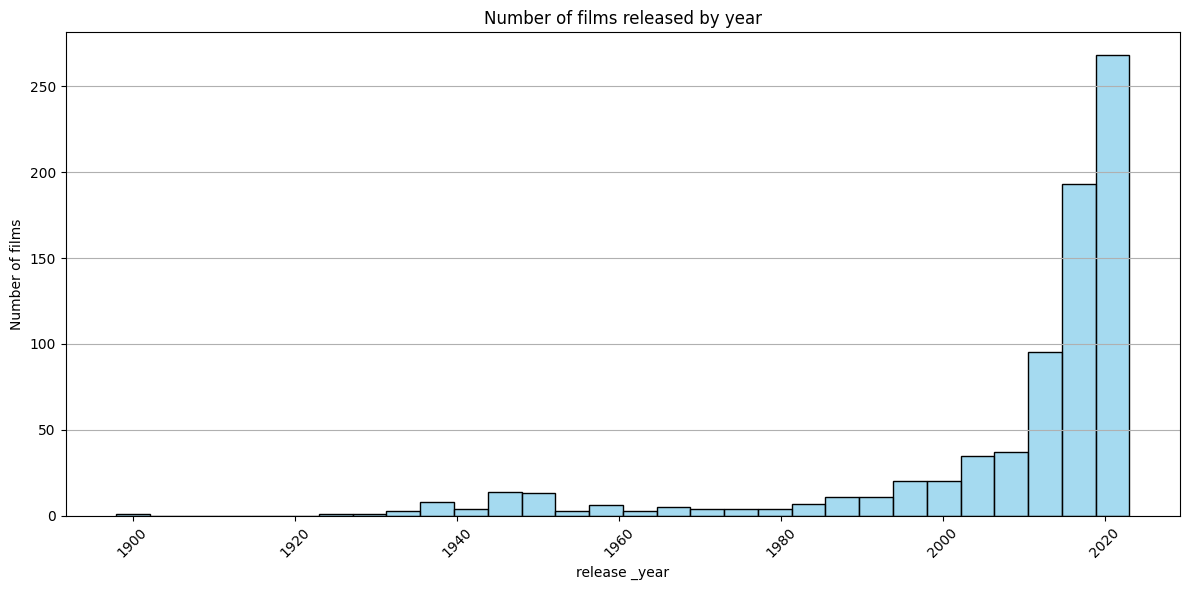

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(x=data1['release_year'], bins=30, kde=False, color='skyblue')
plt.title('Number of films released by year')
plt.xlabel('release _year')
plt.ylabel('Number of films')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Interpretation 

This graph is a histogram representing the number of Christmas movies (y-axis) over the years (x-axis). From this representation, it is evident that the number of Christmas movies produced has been increasing over the years, notably starting from 2010, where there is a noticeable exponential growth in the number of movies.

## E1-2 Representation of movie genres over the years 

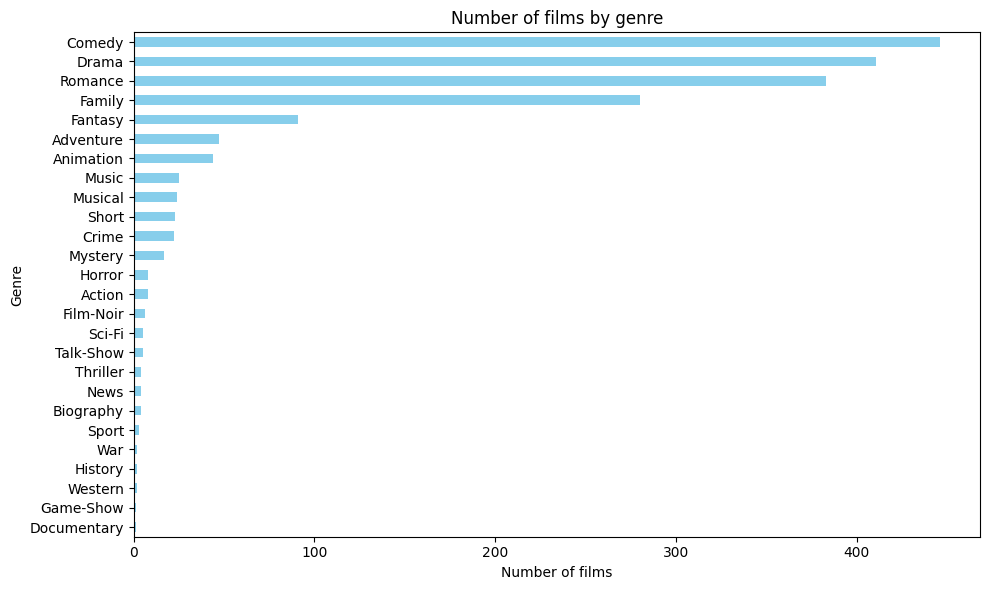

In [26]:
data1['genres_list'] = data1['genre'].str.split(', ')
genres_df = data1.explode('genres_list')
genre_counts = genres_df['genres_list'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='skyblue')
plt.title('Number of films by genre')
plt.xlabel('Number of films')
plt.ylabel('Genre')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


- Interpretation

 The analysis of this graph reveals that the most popular genres for Christmas movies are Comedy (with over 400 films), Drama (approximately 400), Romance, and Family. These genres dominate the landscape of Christmas-themed films, reflecting the preferences and trends among audiences during the holiday season.


## E1-3 : Distribution of Christmas movies based on their ratings 

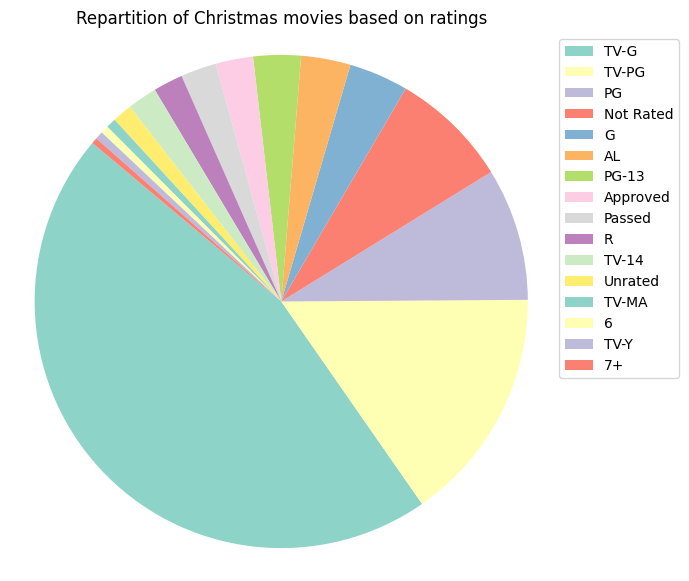

In [27]:

rating_counts = data1['rating'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(rating_counts, labels=[''] * len(rating_counts), startangle=140, colors=plt.cm.Set3.colors)
plt.title('Repartition of Christmas movies based on ratings')
plt.legend(rating_counts.index, loc='best', bbox_to_anchor=(1, 1))
plt.axis('equal')  
plt.show()

- Interpretation 

This is a pie chart illustrating the frequency of Christmas movies according to their ratings. It reveals that the majority of Christmas movies have a TV-MA rating, while very few are labeled as 'Not Rated.' The distribution of ratings provides insights into the rating preferences within the Christmas movie genre.

## E1-4- Words Cloud

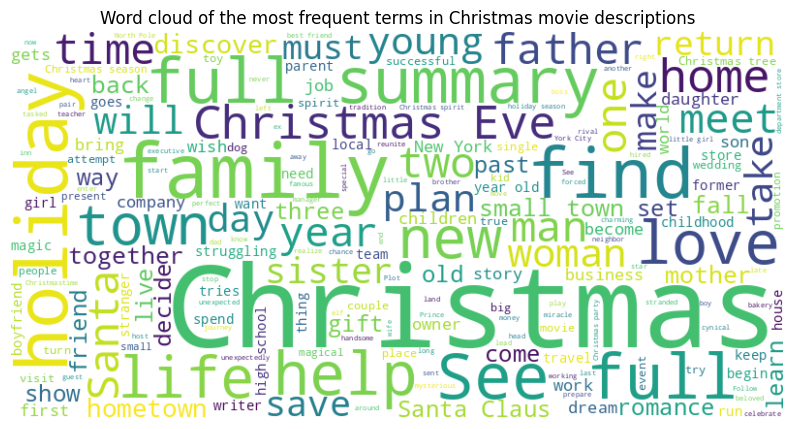

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_descriptions = ' '.join(data1['description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of the most frequent terms in Christmas movie descriptions')
plt.show()

- Interpretation 

This word cloud enables us to identify the most frequent terms in Christmas movie descriptions, including words such as 'Christmas,' 'SANTA,' 'family,' and 'holiday.' Further analysis reveals the recurring themes and key elements that characterize these festive films. Understanding the prevalent terms aids in recognizing the central themes and storytelling components that contribute to the holiday spirit portrayed in Christmas movies. This analysis serves as a valuable tool for content creators, marketers, and audiences to gauge the common themes and sentiments associated with Christmas films.

## E1-5 : Visualization of the Relationship Between Certain Quantitative Variables Based on Genre

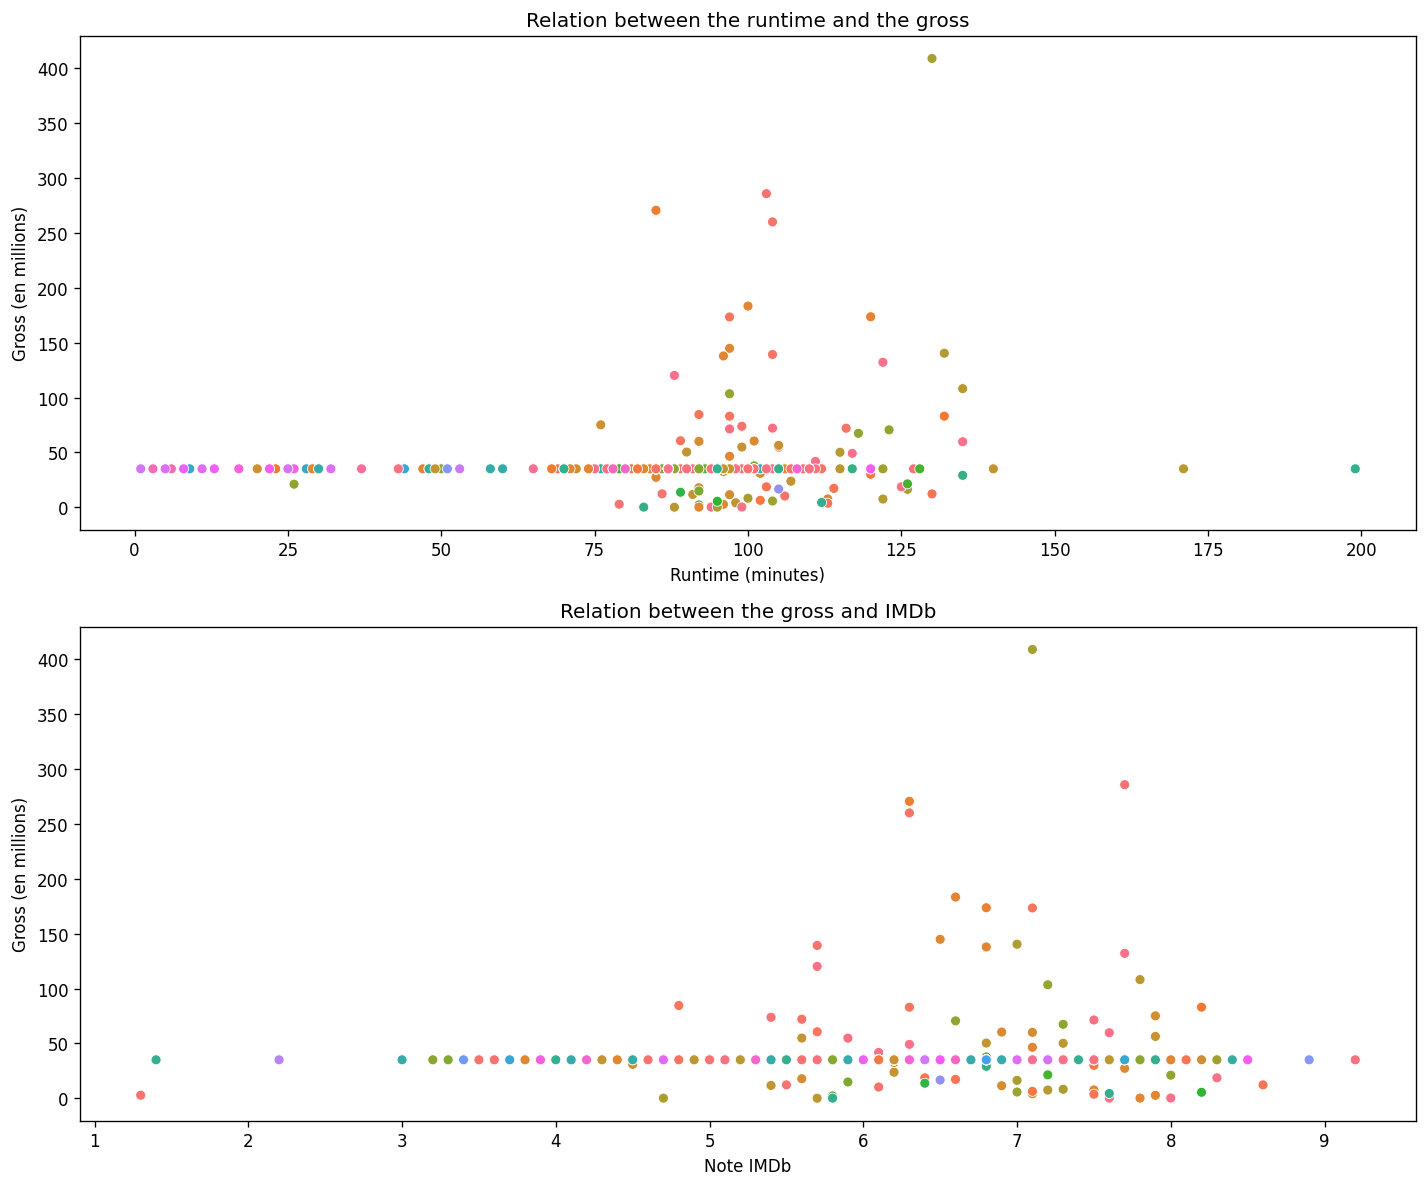

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
xmas_movies_cleaned = data1.dropna(subset=['gross', 'runtime', 'imdb_rating','genre'])
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10),dpi=120)
sns.scatterplot(x='runtime', y='gross', hue='genre', data=xmas_movies_cleaned, ax=axes[0])
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('Gross (en millions)')
axes[0].set_title('Relation between the runtime and the gross')
axes[0].legend().remove() 
sns.scatterplot(x='imdb_rating', y='gross',hue='genre', data=xmas_movies_cleaned, ax=axes[1])
axes[1].set_xlabel('Note IMDb')
axes[1].set_ylabel('Gross (en millions)')
axes[1].set_title('Relation between the gross and IMDb')
axes[1].legend().remove() 
plt.tight_layout()
plt.show()



- Interpretation

In this representation across the two subplots, it is evident that for the scatter plots (runtime, gross), the points align along the same horizontal line. This suggests that approximately the same revenue is generated for the majority of film durations. Additionally, the points do not exhibit distinct patterns in terms of colors, indicating that there is no discernible categorization of genres based on film duration. As for the IMDb ratings, we can also infer that they do not significantly explain the variations in gross revenue, as the points are almost uniformly aligned for any given rating value. The lack of differentiation in the points suggests a limited influence of IMDb ratings on box office earnings.

## E1-6: Correlation Matrix of Numeric Variables in Data 1

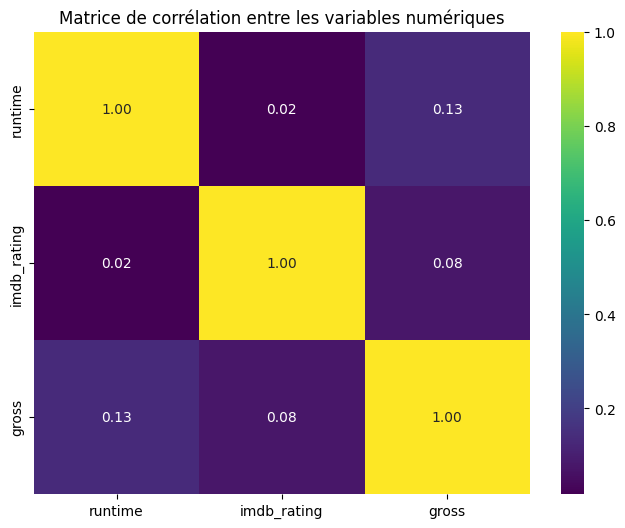

In [30]:
numerical_columns = [ 'runtime', 'imdb_rating', 'gross']
subset_data = data1[numerical_columns]
correlation_matrix = subset_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', annot_kws={"size": 10})
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()

- Interpretation 

The correlation matrix confirms the results obtained from the previous scatter plots. Specifically, the pairs of variables, 'gross' and 'runtime,' as well as 'gross' and 'imdb_rating,' exhibit weak correlations, with correlation coefficients of 0.13 and 0.08, respectively. Therefore, there is a low influence relationship between these pairs of variables on the revenue of the films."

## E1-7 : Top 10 Directors with the Highest Box Office Revenues.

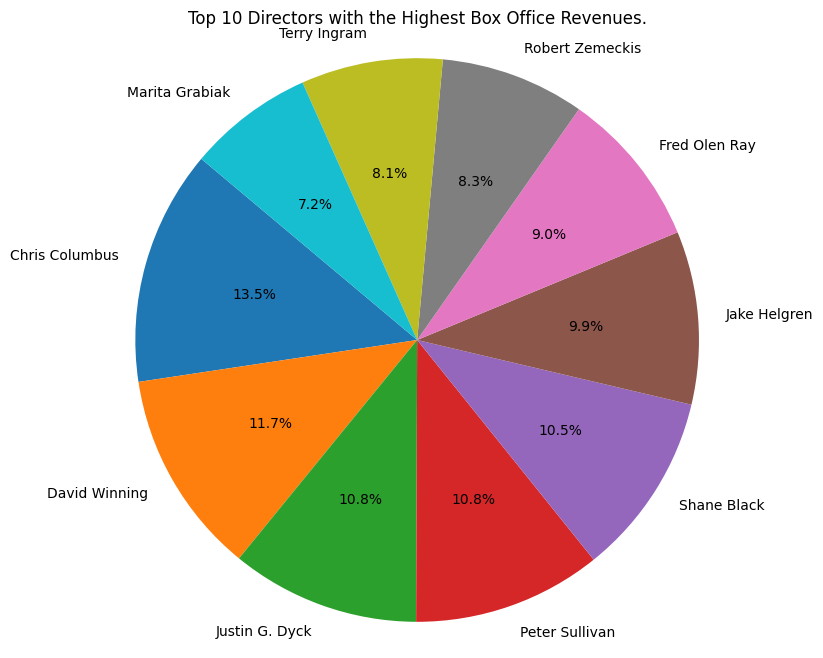

In [31]:

director_gross = data1.groupby('director')['gross'].sum().sort_values(ascending=False)
top_directors = director_gross.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Directors with the Highest Box Office Revenues.')
plt.show()


- Interpretation

This graph reveals that the director who achieved the highest box office revenue is Mr. Chris Columbus, contributing to 13.5% of the total earnings. This statistical analysis underscores the significant impact of Chris Columbus on the overall box office success, as his films have garnered a substantial portion of the total revenue. 

## E1-8 : Top 10 Actors with the Highest Box Office Profits

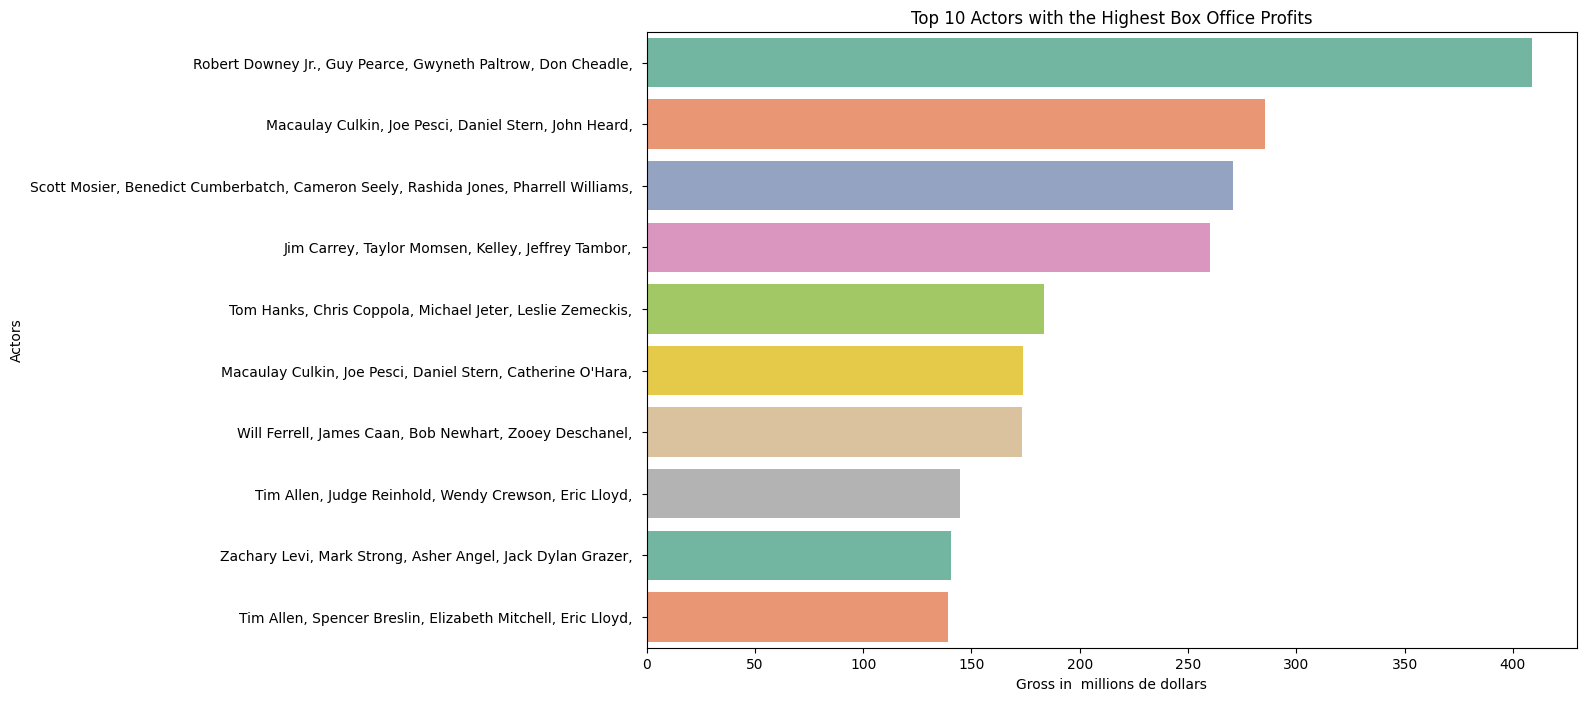

In [32]:
top_actors_profit = data1.groupby('stars')['gross'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_actors_profit.values, y=top_actors_profit.index, palette='Set2')
plt.title('Top 10 Actors with the Highest Box Office Profits')
plt.xlabel('Gross in  millions de dollars')
plt.ylabel('Actors')
plt.show()


## E1-9 : Density of Runtime Based on the Genre of Christmas Movies

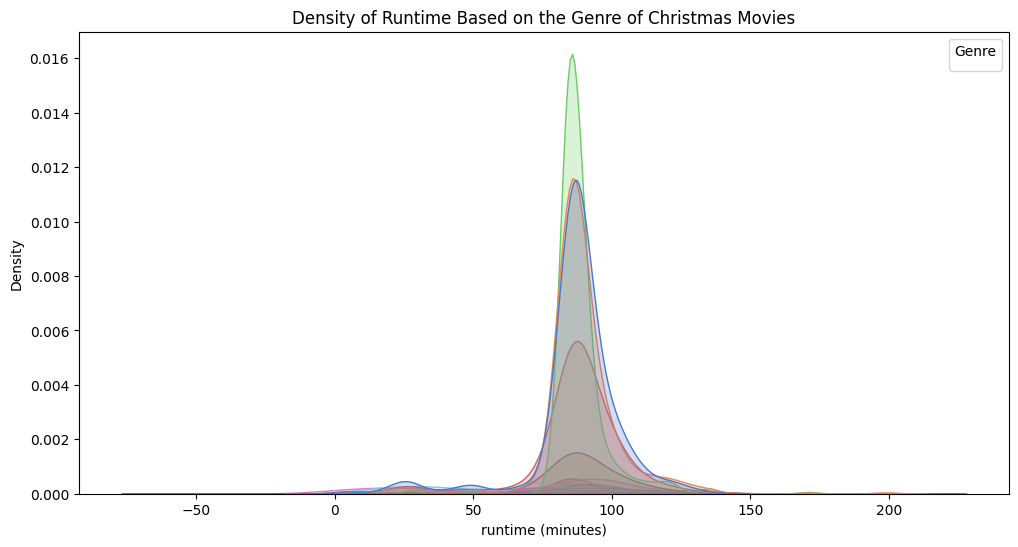

In [33]:
xmas_movies = data1.assign(genre=data1['genre'].str.split(', ')).explode('genre')
plt.figure(figsize=(12, 6))
sns.kdeplot(data=xmas_movies, x='runtime', hue='genre', fill=True, palette='muted')
plt.title('Density of Runtime Based on the Genre of Christmas Movies')
plt.xlabel('runtime (minutes)')
plt.ylabel('Density')
plt.legend(title='Genre', loc='upper right')
plt.show()

- Interpretation 

This graph presents the probability density function of the 'runtime' variable based on the genres of Christmas movies. Initially, it is noticeable that the various distributions resemble a normal distribution, all centered around a runtime value approximately equal to 90. Some distributions appear wider, while others are more peaked, indicating variations in the spread of movie durations.

The genre of films contributes to the shape of the distributions, influencing whether they are more flattened or sharper. This observation suggests that certain genres tend to have more consistent or concentrated runtime distributions compared to others. Understanding these patterns can offer insights into audience expectations and preferences related to the duration of Christmas movies within different genres

## E1-10 : Box Office Revenue of Christmas Movies Over the Years.


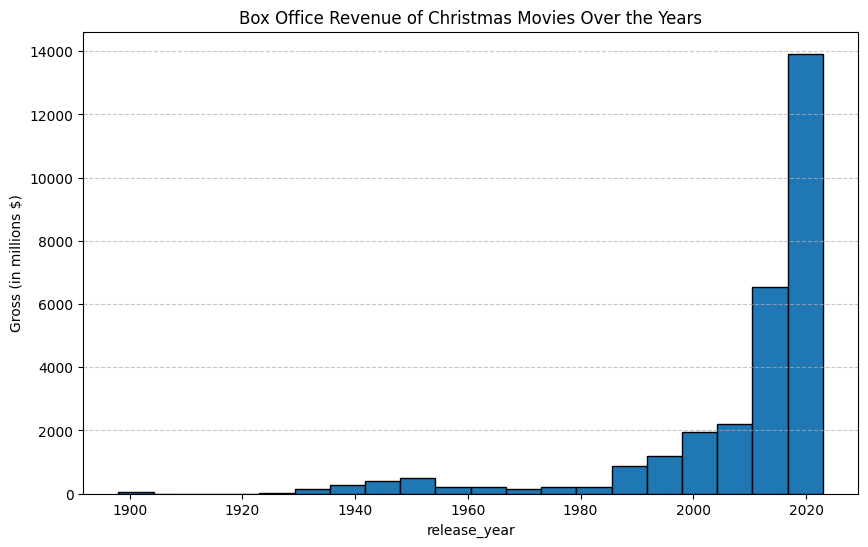

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(data1['release_year'], weights=data1['gross'], bins=20, edgecolor='black')
plt.xlabel('release_year')
plt.ylabel('Gross (in millions $)')
plt.title('Box Office Revenue of Christmas Movies Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Interpretation 

From this representation, it is evident that over the years, the box office revenues show an increasing trend, especially after 2010, where a rapid surge is observed. This is likely attributed to the exponential growth in the number of films released during that period

## E-1-11: Density function of Gross

Text(0.5, 1.0, 'Distribution of density  function')

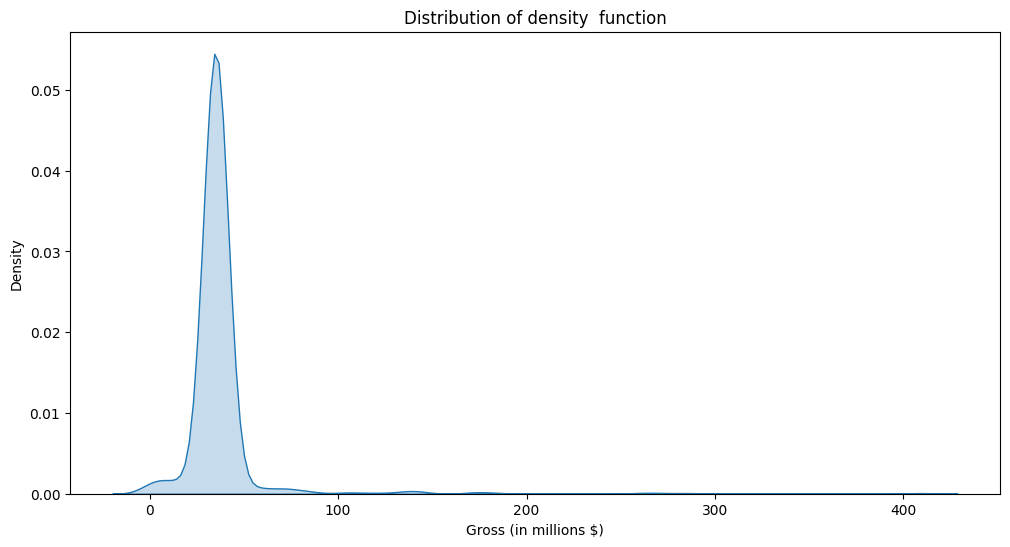

In [35]:

plt.figure(figsize=(12, 6))
sns.kdeplot(data1['gross'], shade=True)
plt.xlabel('Gross (in millions $)')
plt.title('Distribution of density  function')

- Interpretation 

This distribution reveals that the revenue curve follows a normal distribution pattern. The width of the band is relatively narrow, and it exhibits a sharp and peaked height. This suggests that the distribution of box office revenues for Christmas movies is relatively concentrated around a central value. The narrow spread implies that, in reality, there is a consistent range of box office earnings for Christmas movies, with a notable concentration of movies falling within a specific revenue range. The analysis provides insights into the typical financial performance of Christmas movies, offering a glimpse into the economic dynamics of this genre.

## E-1-11 : Descriptive Statistics Table








In [38]:
data1.describe()

,release_year,runtime,imdb_rating,gross
count,771.000000,771.000000,771.000000,771.000000
mean,2008.230869,86.644617,6.117899,37.607198
std,20.562761,18.733213,0.946499,24.987631
min,1898.000000,1.000000,1.300000,0.010000
25%,2008.000000,84.000000,5.600000,35.030000
50%,2016.000000,87.000000,6.200000,35.030000
75%,2020.000000,92.000000,6.600000,35.030000
max,2023.000000,199.000000,9.200000,409.010000


- Interpretation 

This statistical table reveals that, on average, Christmas movies have a duration of 86.64 minutes, with a standard deviation of 18.73. More than 25% of the films have a runtime of 84 minutes, and the duration of movies varies between 1 and 199 minutes. Furthermore, the average IMDb rating for these films is 6.11, with a low standard deviation of 0.93, indicating a narrow dispersion of rating values. IMDb ratings range from 1.3 to 9.2. At least 75% of the films have an IMDb rating equal to or less than 6.6. Regarding the box office revenue, the mean gross revenue is 6.12, with a standard deviation of 0.95. The revenue distribution spans from 1.3 to 9.2

## E-2 : Exploratory Data Aanlysis based on imdb_top1k.csv

In [39]:
data2.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,28341469.0
1,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,134966411.0
2,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,534858444.0
3,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,57300000.0
4,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,4360000.0


## E-2-1 :  Relationship between Metascore and box office revenue.

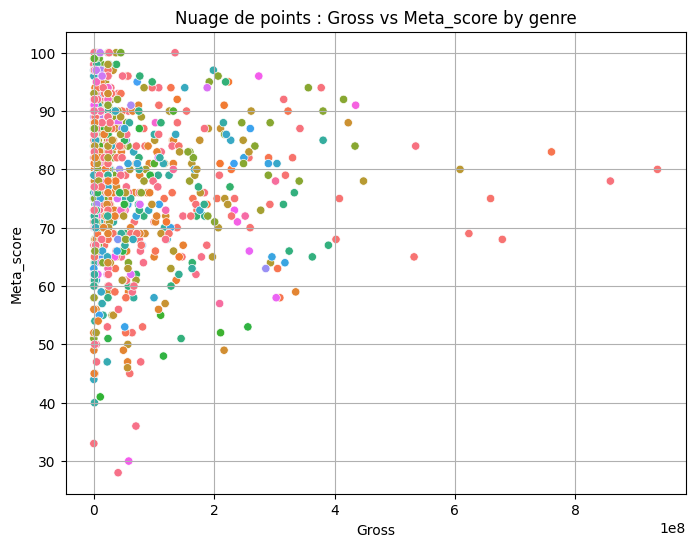

In [42]:
movies_data = data2.dropna(subset=['Gross', 'Meta_score'])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=movies_data, x='Gross', y='Meta_score', hue='Genre', legend=False)
plt.title('Nuage de points : Gross vs Meta_score by genre')
plt.xlabel('Gross')
plt.ylabel('Meta_score')
plt.grid(True)
plt.show()

- Interpretation 

"According to this scatter plot, it appears that the variable 'Metascore' does not significantly impact the 'Gross' variable. An increase in Metascores does not seem to have a substantial effect on the box office revenue (Gross) variable."

## E2-2 : Box Office Revenue Over the Years.

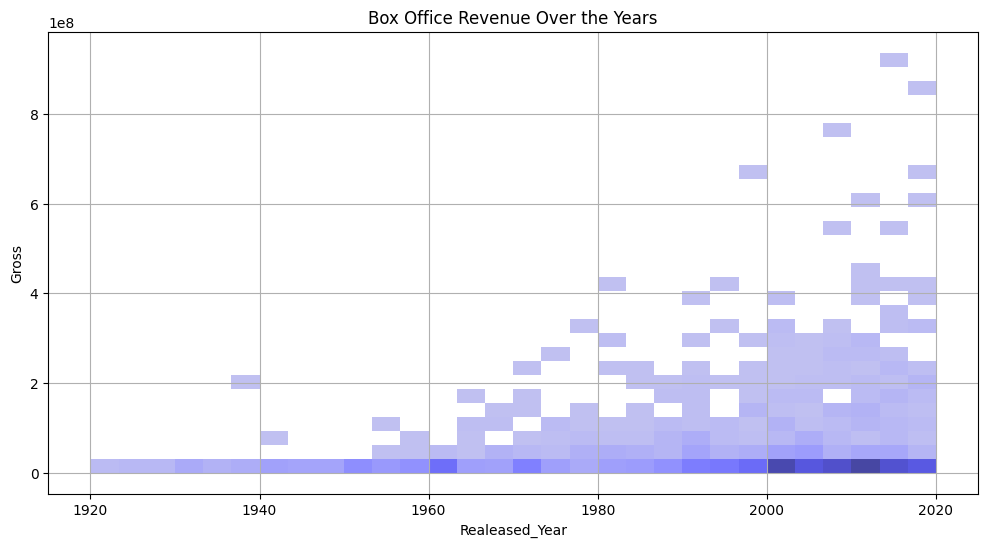

In [45]:

movies_data = data2.dropna(subset=['Gross', 'Released_Year'])

plt.figure(figsize=(12, 6))
sns.histplot(data=movies_data, x='Released_Year', y='Gross', bins=30,color='blue')

plt.title('Box Office Revenue Over the Years')
plt.xlabel('Realeased_Year')
plt.ylabel('Gross')


plt.grid(True)
plt.show()

## E2-3 : Distribution Based on Certificates

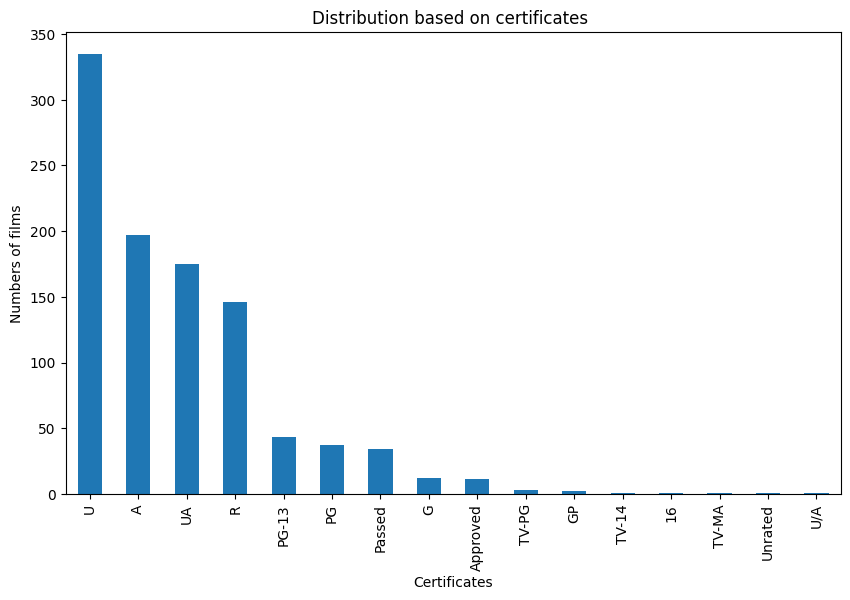

In [46]:
certificate_counts = data2['Certificate'].value_counts()
plt.figure(figsize=(10, 6))
certificate_counts.plot(kind='bar')
plt.title('Distribution based on certificates ')
plt.xlabel('Certificates')
plt.ylabel('Numbers of films')

# Afficher l'histogramme
plt.show()


- Interpretation

According to this histogram, it is evident that the majority of films, over 300 in total, have obtained a 'U' certificate. This data suggests a prevalent trend where a substantial number of Christmas movies are categorized under the 'U' certification. The 'U' certification typically indicates that the film is suitable for all audiences, aligning with the family-friendly nature often associated with Christmas movies. This distribution underscores the family-oriented and inclusive nature of Christmas films within the dataset.

## E2-4 Correlation Matrix for Data 2

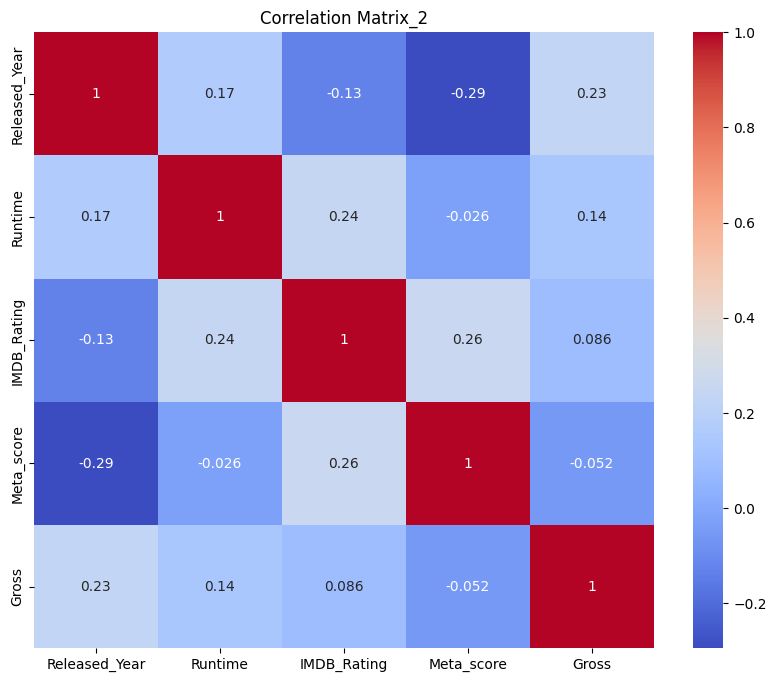

In [47]:

correlation_matrix = data2.corr()  

# Tracer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  

# Ajouter un titre
plt.title('Correlation Matrix_2')

# Afficher la heatmap
plt.show()

## E2-6 : Descriptive Statistc Table 

In [48]:
data2.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,Gross
count,999.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1991.217217,122.891000,7.949300,78.133000,6.051360e+07
std,23.297025,28.093671,0.275491,11.368225,1.014192e+08
min,1920.000000,45.000000,7.600000,28.000000,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.012919e+06
50%,1999.000000,119.000000,7.900000,79.000000,2.353089e+07
75%,2009.000000,137.000000,8.100000,85.250000,6.153989e+07
max,2020.000000,321.000000,9.300000,100.000000,9.366622e+08


## E3 : Exploratory Data analysis based on movies_bugets.csv

In [49]:
data3.head()

,year,date,title,production budget
0,2022.0,"Dec 9, 2022",Avatar: The Way of Water,460000000
1,2019.0,"Apr 23, 2019",Avengers: Endgame,400000000
2,2011.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000
3,2015.0,"Apr 22, 2015",Avengers: Age of Ultron,365000000
4,2023.0,"May 17, 2023",Fast X,340000000


## E3-1 : Descriptive Statisctics Table 

In [50]:
data3.describe()

,year,production budget
count,6328.000000,6.328000e+03
mean,2005.118363,3.298874e+07
std,13.184220,4.410644e+07
min,1915.000000,8.600000e+01
25%,2000.000000,5.000000e+06
50%,2008.000000,1.700000e+07
75%,2014.000000,4.000000e+07
max,2027.000000,4.600000e+08


- Interpretation

The production budget statistics reveal a considerable diversity in the financial investments made in these films. While the average budget is around $60 million, there is a significant range, indicating that some films have relatively modest budgets, while others involve substantial financial investments. The high standard deviation suggests a wide dispersion of budget values, emphasizing the heterogeneity in the production budget distribution. Filmmakers and industry stakeholders can use this information to understand the financial landscape of Christmas movies, providing valuable insights for budgeting and financial planning in the film industry.

## E3-2 : Boxplot of Production budget 

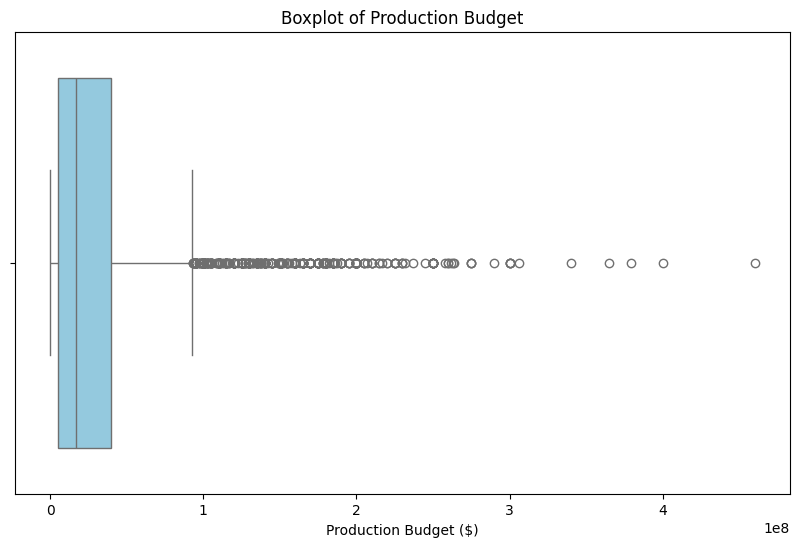

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=data3['production budget'],color='skyblue')
plt.title('Boxplot of Production Budget')
plt.xlabel('Production Budget ($)')
plt.show()


- Interpretation 

This boxplot visually represents the descriptive statistics obtained in the previous table. It is evident from the boxplot that there are several outliers within the data of the 'Production_Budget' variable. Outliers are data points that significantly deviate from the majority of the distribution. Their presence suggests the existence of films with unusually high production budgets compared to the majority of the dataset. Understanding and addressing these outliers can be crucial for a more accurate analysis and interpretation of the overall distribution of production budgets for Christmas movies

## F- Analyis Part 4 : Features Engenniering

## F1- Combining the various databases

_We have data across multiple databases that we intend to combine to create a unified database for analysis. To achieve this, we will utilize methods from the pandas library._

In [60]:
xmas_movies = data2
movie_budgets = data3
merged_data = pd.merge(xmas_movies, movie_budgets, left_on='Series_Title', right_on='title', how='inner')
merged_data.head()


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross,year,date,title,production budget
0,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,28341469.0,1994.0,"Sep 23, 1994",The Shawshank Redemption,25000000
1,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,134966411.0,1972.0,"Mar 15, 1972",The Godfather,7000000
2,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,534858444.0,2008.0,"Jul 11, 2008",The Dark Knight,185000000
3,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,57300000.0,1974.0,"Dec 11, 1974",The Godfather: Part II,13000000
4,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,4360000.0,1957.0,"Apr 13, 1957",12 Angry Men,340000


## F-2 : Deletion of qualitative variables

_We are going to proceed with a quantitative analysis of the data; therefore, we will remove the qualitative variables from the database._

In [61]:
qualitative_variables = ['Series_Title', 'Certificate', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'date', 'title']
merged_data.drop(columns=qualitative_variables, inplace=True)


In [62]:
merged_data.head()

,Released_Year,Runtime,IMDB_Rating,Meta_score,Gross,year,production budget
0,1994.0,142,9.3,80.0,28341469.0,1994.0,25000000
1,1972.0,175,9.2,100.0,134966411.0,1972.0,7000000
2,2008.0,152,9.0,84.0,534858444.0,2008.0,185000000
3,1974.0,202,9.0,90.0,57300000.0,1974.0,13000000
4,1957.0,96,9.0,96.0,4360000.0,1957.0,340000


## F-3 : Creation of the variable 'Years_Passed' representing the age of film releases.

In [63]:
merged_data.drop(columns=['year'], inplace=True)

In [64]:
merged_data['Years_Passed'] = 2023 - merged_data ['Released_Year']

In [65]:
merged_data.drop('Released_Year', axis=1, inplace=True)

In [66]:
merged_data.head()

,Runtime,IMDB_Rating,Meta_score,Gross,production budget,Years_Passed
0,142,9.3,80.0,28341469.0,25000000,29.0
1,175,9.2,100.0,134966411.0,7000000,51.0
2,152,9.0,84.0,534858444.0,185000000,15.0
3,202,9.0,90.0,57300000.0,13000000,49.0
4,96,9.0,96.0,4360000.0,340000,66.0


## F-4 : Correlation Matrix 3

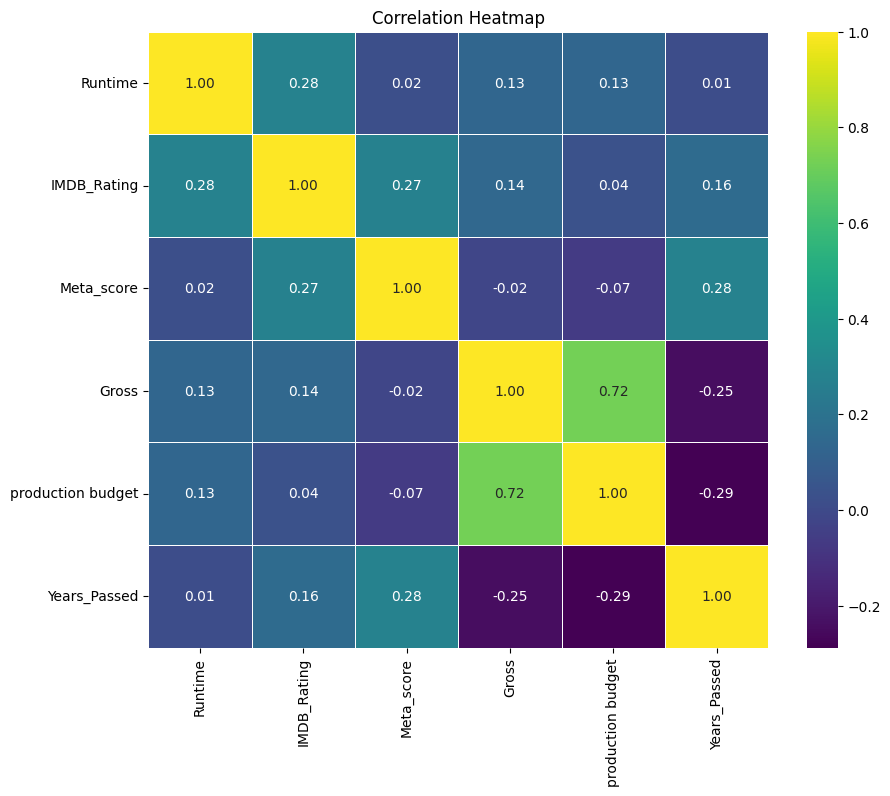

In [68]:
correlation_matrix = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## F-5 : Cleaning the new database

In [69]:
df=merged_data
missing_values = df.isnull().sum()

In [71]:
df.dropna(subset=['Years_Passed'], inplace=True)

In [72]:
df.head()

,Runtime,IMDB_Rating,Meta_score,Gross,production budget,Years_Passed
0,142,9.3,80.0,28341469.0,25000000,29.0
1,175,9.2,100.0,134966411.0,7000000,51.0
2,152,9.0,84.0,534858444.0,185000000,15.0
3,202,9.0,90.0,57300000.0,13000000,49.0
4,96,9.0,96.0,4360000.0,340000,66.0


## F-6 Conversion of the 'Gross' and 'Production' variables into millions

In [74]:
df['production budget'] = df['production budget'] / 1000000  
df['Gross'] = df['Gross'] / 1000000  
df.head()

,Runtime,IMDB_Rating,Meta_score,Gross,production budget,Years_Passed
0,142,9.3,80.0,0.000028,2.500000e-05,29.0
1,175,9.2,100.0,0.000135,7.000000e-06,51.0
2,152,9.0,84.0,0.000535,1.850000e-04,15.0
3,202,9.0,90.0,0.000057,1.300000e-05,49.0
4,96,9.0,96.0,0.000004,3.400000e-07,66.0


## G- Analysis Part 5 : Model training using Machine learning (Multiple Linear Regression)

_We are dealing with quantitative variables, with the dependent variable being 'Gross.' We will utilize a multiple linear regression model to explore the relationship and understand how the explanatory variables influence the 'Gross' variable and in what proportion. The application of this model is supported by its ability to analyze the impact of multiple predictor variables on the response variable._

_By fitting this model, we can quantify the impact of each explanatory variable on the 'Gross' variable and assess the overall goodness of fit. This analysis provides valuable insights into the factors influencing the box office revenue of Christmas movies._

## G-1 : Why does we choose MLR ?

We choose to use a multiple linear regression model is appropriate in this case for several reasons:

1. **Multivariate Analysis:**
   - Multiple linear regression allows us to analyze the relationship between multiple independent variables and a single dependent variable simultaneously. In the context of predicting the 'Gross' of Christmas movies, we likely have several factors influencing the box office revenue, such as production budget, IMDb ratings, runtime, and more.

2. **Quantifying Relationships:**
   - The model helps quantify the impact of each explanatory variable on the dependent variable. By estimating the coefficients, we can understand the direction and strength of the relationships. For instance, it can reveal how changes in the production budget or IMDb ratings correspond to changes in the box office revenue.

3. **Interpretability:**
   - Linear regression models are relatively interpretable. The coefficients in the model represent the change in the dependent variable for a one-unit change in the respective independent variable, holding other variables constant. This interpretability is valuable for understanding the practical significance of each variable.

4. **Statistical Significance:**
   - The model can provide insights into the statistical significance of each predictor variable. By analyzing p-values, we can assess whether each variable significantly contributes to predicting the 'Gross,' helping us identify the most influential factors.

5. **Assumption Checking:**
   - Regression models come with assumptions (linearity, independence, homoscedasticity, normality of residuals), and checking these assumptions is part of the analysis. Addressing violations ensures the reliability of the model.

6. **Predictive Power:**
   - Given that we aim to predict the box office revenue of Christmas movies, a multiple linear regression model offers a balance between simplicity and predictive power. More complex models might risk overfitting, especially with limited data.

7. **Common Practice:**
   - Multiple linear regression is a common and widely used technique in statistical analysis and prediction. Its simplicity, interpretability, and effectiveness make it a suitable choice for initial analyses.

In summary, the multiple linear regression model is chosen for its ability to handle multiple predictor variables, provide interpretability, and offer a straightforward approach to understanding the relationships within the data. It is a practical choice for predicting the box office revenue of Christmas movies while considering various influencing factors.

## G-2 :Separation and Normalization of Data (Features and Target Variable)

_We will specify the matrix of explanatory variables X and then the column of the target variable Y. Next, we will proceed with the normalization of the data._

In [78]:
X = df.drop('Gross', axis=1)
y = df['Gross']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## G-3 : Train set(80%) and Test set (20%)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## G-4 : Creation and Training of the Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

## G-5 : Results 

In [81]:
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     132.9
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           1.22e-92
Time:                        12:54:07   Log-Likelihood:                 4536.8
No. Observations:                 565   AIC:                            -9062.
Df Residuals:                     559   BIC:                            -9036.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0004   8.93e-0

## G-6 Model Evaluation 

_We will evaluate the model's quality based on the Root Mean Squared Error (RMSE) and R-squared. Afterward, we will conduct various tests on multiple regression to assess if the model is well-fitted._

In [84]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=False)
print("RMSE:", rmse)
r_squared = r2_score(y_test, preds)
print("Coefficient de détermination (R²) :", r_squared)

RMSE: 7.18930988790914e-05
Coefficient de détermination (R²) : 0.5369332852978221


## G-7 : Comments

The values provided indicate the performance of the multiple linear regression model:

1. **Root Mean Squared Error (RMSE): 7.1893e-05**
   - The RMSE is a measure of the model's accuracy, representing the square root of the average squared differences between the predicted and actual values. In this case, the small RMSE value suggests that the model's predictions are close to the actual values, indicating good predictive performance.

2. **Coefficient of Determination (R²): 0.537**
   - The R-squared value measures the proportion of the variance in the dependent variable ('Gross') that is predictable from the independent variables. An R-squared value of 0.537 means that approximately 53.7% of the variability in the box office revenue can be explained by the model. This suggests a moderate level of explanatory power.

**Interpretation:**
- The low RMSE indicates that the model is making accurate predictions with small errors.
- The R-squared value of 0.537 suggests that a significant portion of the variance in box office revenue is captured by the model. However, there is still room for improvement, and around 46.3% of the variability remains unexplained.

## G-8 : Hypothesis Testing in Linear Regression

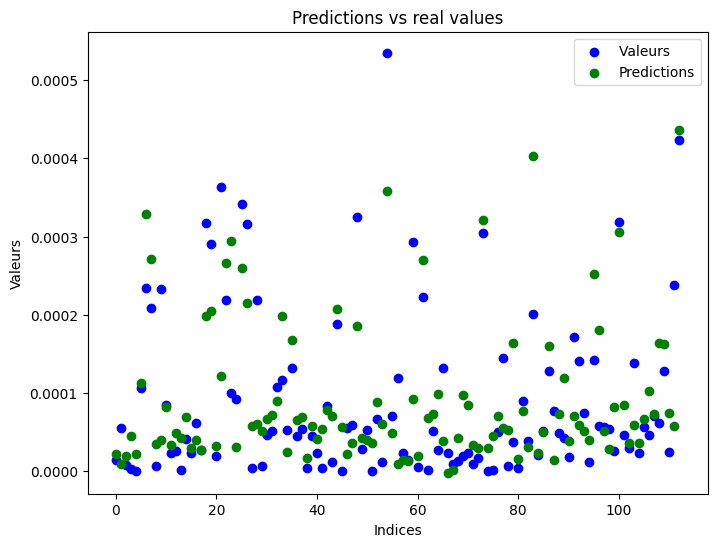

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valeurs ')
plt.scatter(range(len(preds)), preds, color='green', label='Predictions')
plt.title('Predictions vs real values')
plt.xlabel('Indices')
plt.ylabel('Valeurs')
plt.legend()

- Interpretation 

This graph demonstrates that the predictions closely align with the actual values. The proximity between predicted and actual values suggests a high level of accuracy in the model's performance. The model seems to effectively capture the underlying patterns in the data, reflecting its capability to make reliable predictions. The consistency between predicted and observed values reinforces the model's reliability and suitability for predicting the box office revenue of Christmas movies.

* Normalité des résidus 

In [89]:
from scipy import stats
residuals = y_test - preds
p_value = stats.shapiro(residuals)[1]
alpha = 0.05
print(p_value)

1.9188512396794977e-06


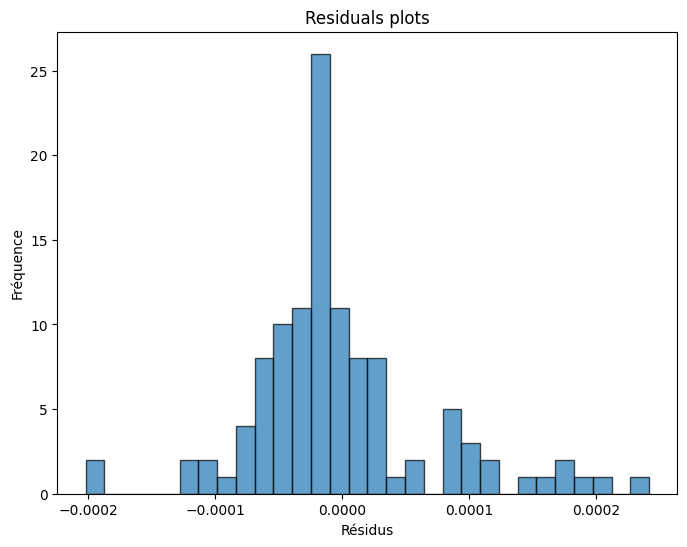

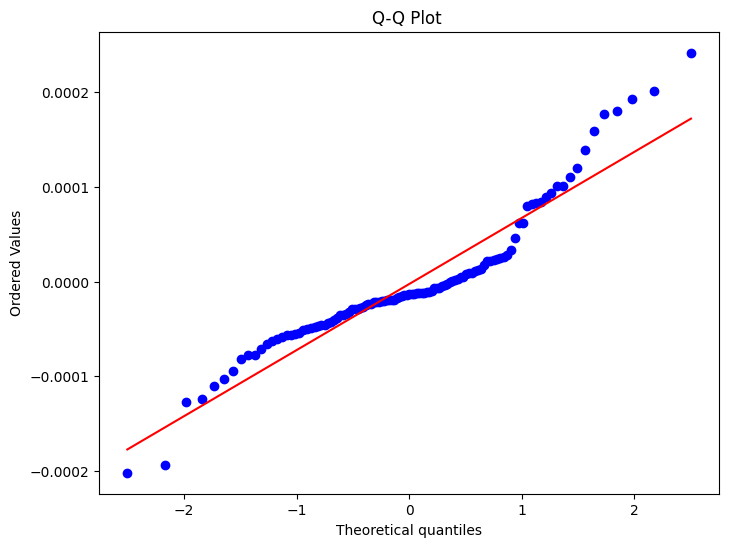

In [91]:
residuals = y_test - preds
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Residuals plots')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot ')
plt.show()


## H-  Analysis part 6 :Predictions 

Title: The Magic of Bellmonte Lane

Description: "The Magic of Bellmonte Lane" is a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic.

Director: Greta Gerwig

Cast:

Emma Thompson as Emily, a kind-hearted and curious woman
Ian McKellen as Mr. Grayson, the stern corporate developer
Tom Hanks as George, the wise and elderly owner of the local cafe
Zoe Saldana as Sarah, Emily's supportive best friend
Jacob Tremblay as Timmy, a young boy with a special Christmas wish
Runtime: 105 minutes

Genres: Family, Fantasy, Romance, Holiday

Production budget: $25M

In [106]:
features_subset = ['production budget', 'Runtime']
X_subset = df[features_subset]
model_subset = sm.OLS(df['Gross'], sm.add_constant(X_subset)).fit()

In [107]:
import statsmodels.api as sm
df_new = pd.DataFrame({
    'production budget': [25],  
    'Runtime': [105],  
})
df_new = sm.add_constant(df_new, has_constant='add')  
predicted_gross_subset = model_subset.predict(df_new)
print("Predicted Gross (Subset Model):", predicted_gross_subset)


Predicted Gross (Subset Model): 0    36.724363
dtype: float64


## I- Interpretation about Predictions

The predicted gross revenue for the given subset of production budget and runtime is approximately $36.72 million.

According to the subset model, the predicted gross revenue for a movie with a production budget of 25 million and a runtime of 105 minutes is approximately 36.72 million. This prediction is based on the relationships observed in the data used to train the model.

It's important to note that predictions are estimates based on statistical relationships within the dataset. The model suggests that, given similar conditions to those in the dataset, a movie with the specified production budget and runtime is expected to generate around $36.72 million in gross revenue.

However, predictions have inherent uncertainties, and the actual performance of a movie can be influenced by various factors beyond what the model considers. Filmmakers and industry professionals should interpret predictions cautiously, considering them as informed estimates rather than precise outcomes.

## J - Conclusion and Recommandations

The regression analysis provides insights into the factors influencing film gross revenue based on the estimated coefficients and statistical significance:

The regression coefficients reveal the impact of various variables on gross revenue. Notably, the 'Production Budget' variable has a substantial positive coefficient of approximately 1.4293, indicating a significant positive influence on gross revenue. This suggests that allocating additional resources to the production budget is associated with a considerable increase in gross revenue. Additionally, the 'IMDB_Rating' variable has a positive coefficient of 4.817e-05, suggesting that higher IMDB ratings are linked to increased gross revenue. On the other hand, 'Meta_score' and 'Runtime' do not appear to have a statistically significant impact on gross revenue, as their coefficients are not significantly different from zero.

Years_Passed Variable:
The 'Years_Passed' variable, with a coefficient of -3.929e-07, shows a negative association with gross revenue. This implies that as more years pass since a film's release, there is a slight decrease in gross revenue. The negative coefficient suggests a diminishing impact over time. This variable may capture the gradual decline in revenue as a film becomes older. However, the magnitude of the coefficient is relatively small, indicating a subtle effect.

In summary, the analysis highlights the importance of production budget and IMDB rating in influencing gross revenue. Filmmakers should consider investing strategically in production budgets and focusing on factors that contribute to higher IMDB ratings for improved financial success. The 'Years_Passed' variable suggests a mild temporal effect, emphasizing the need for continuous adaptation to industry dynamics.
## Recommendations:

Optimizing Production Budget:

Filmmakers should prioritize allocating sufficient resources to the production budget, as evidenced by the strong positive coefficient associated with this variable. Strategic investments in production quality, including talent, sets, and special effects, can contribute significantly to higher gross revenue.
Leveraging Positive IMDB Ratings:

Given the positive coefficient for 'IMDB_Rating,' filmmakers should focus on creating content that resonates positively with audiences and critics. Investing in engaging storytelling, impactful performances, and overall quality can lead to higher IMDB ratings, contributing to enhanced financial success.
Continuous Monitoring of Industry Trends:

The 'Years_Passed' variable indicates a subtle negative effect on gross revenue over time. Filmmakers should stay vigilant to evolving industry trends, audience preferences, and technological advancements. Adapting to changing dynamics can help mitigate the potential impact of film age on revenue.
Strategic Marketing and Promotion:

While not directly captured in the regression model, the success of a film is influenced by effective marketing and promotion. Filmmakers should invest in strategic marketing campaigns to create awareness and generate buzz around their productions, potentially boosting both IMDB ratings and overall revenue.
Diversification of Revenue Streams:

Exploring additional revenue streams beyond traditional box office earnings can contribute to overall financial success. This could include digital distribution, streaming rights, merchandise sales, and partnerships. Diversifying revenue streams can help mitigate the impact of external factors on box office performance.
Audience Engagement and Feedback:

Building a strong connection with the audience is crucial. Filmmakers should actively engage with their target audience, gather feedback, and adapt their strategies based on audience preferences. Positive audience reception can translate into higher ratings and increased word-of-mouth promotion.